In [1]:
import numpy as np
import pandas as pd
import random
import time
import psutil

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

from deap import base, creator, tools, algorithms  # Para Algoritmo Gen√©tico
from scipy.optimize import differential_evolution  # Para Evolu√ß√£o Diferencial

In [2]:
data = pd.read_csv('../data/heart_disease.csv')

In [3]:
data.head(5)

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                  NaN  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [5]:
## Verificar valores ausentes por coluna
print(data.isnull().sum())

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [6]:
"""
O "Alcohol Consumption" tem muitos valores ausentes, ent√£o √© melhor remove-lo do dataset. 
"""

# Remover 'Alcohol Consumption' por excesso de valores ausentes
data = data.drop(columns=['Alcohol Consumption'])

In [7]:
data.head(3)

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   

  Family Heart Disease Diabetes        BMI High Blood Pressure  \
0                  Yes       No  24.991591                 Yes   
1                  Yes      Yes  25.221799                  No   
2                   No       No  29.855447                  No   

  Low HDL Cholesterol High LDL Cholesterol Stress Level  Sleep Hours  \
0                 Yes                   No       Medium     7.633228   
1                 Yes                   No         High     8.744034   
2                 Yes                  Yes          Low     4.440440   

  Sugar Consumption  Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0            Medium               342.0                  NaN  12.969246   
1            Medium               133.0                157.0   9.355389   
2               Low               393.0                 92.0  12.709873   

   Homocysteine Level Heart Disease Status  
0           12.387250                   No  
1           19.298875                   No  
2           11.230926                   No

In [8]:
"""
As outras colunas t√™m poucos valores ausentes, ent√£o pode-se tratar com um m√©todo de imputa√ß√£o 
"""
# Para colunas num√©ricas: preencher com mediana
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())


# Para colunas categ√≥ricas: preencher com o valor mais frequente (moda)
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


In [9]:
## Verificar valores ausentes por coluna
print(data.isnull().sum())

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


In [10]:
# Ver tipos de dados
print(data.dtypes)

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object


In [11]:
# Ver valores √∫nicos por coluna categ√≥rica (para decidir o tipo de encoding)
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].unique()}")

Gender: ['Male' 'Female']
Exercise Habits: ['High' 'Low' 'Medium']
Smoking: ['Yes' 'No']
Family Heart Disease: ['Yes' 'No']
Diabetes: ['No' 'Yes']
High Blood Pressure: ['Yes' 'No']
Low HDL Cholesterol: ['Yes' 'No']
High LDL Cholesterol: ['No' 'Yes']
Stress Level: ['Medium' 'High' 'Low']
Sugar Consumption: ['Medium' 'Low' 'High']
Heart Disease Status: ['No' 'Yes']


In [12]:

from sklearn.preprocessing import LabelEncoder

# Copia do dataset original para codifica√ß√£o
data_encoded = data.copy()

# LabelEncoder para vari√°veis categ√≥ricas bin√°rias
binary_cols = []

# Detectar colunas com 2 categorias (bin√°rias)
# Ex: Gender: ['Male' 'Female']
for col in data_encoded.select_dtypes(include='object').columns:
    if data_encoded[col].nunique() == 2:
        binary_cols.append(col)

# Aplicar LabelEncoder
le = LabelEncoder()
for col in binary_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])

# OneHotEncoder para colunas com mais de 2 categorias
# (ex: 'Stress Level', se tiver valores como 'Low', 'Medium', 'High')
multi_cat_cols = [col for col in data_encoded.select_dtypes(include='object').columns
                  if col not in binary_cols]

# Aplicar OneHotEncoding via pd.get_dummies
data_encoded = pd.get_dummies(data_encoded, columns=multi_cat_cols, drop_first=True)


In [13]:
data_encoded.head(5)

Age  Gender  Blood Pressure  Cholesterol Level  Smoking  \
0  56.0       1           153.0              155.0        1   
1  69.0       0           146.0              286.0        0   
2  46.0       1           126.0              216.0        0   
3  32.0       0           122.0              293.0        1   
4  60.0       1           166.0              242.0        1   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0                     1         0  24.991591                    1   
1                     1         1  25.221799                    0   
2                     0         0  29.855447                    0   
3                     1         0  24.130477                    1   
4                     1         1  20.486289                    1   

   Low HDL Cholesterol  ...  Fasting Blood Sugar  CRP Level  \
0                    1  ...                120.0  12.969246   
1                    1  ...                157.0   9.355389   
2                    1  ...                 92.0  12.709873   
3                    0  ...                 94.0  12.509046   
4                    0  ...                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  Exercise Habits_Low  \
0           12.387250                     0                False   
1           19.298875                     0                False   
2           11.230926                     0                 True   
3            5.961958                     0                False   
4            8.153887                     0                 True   

   Exercise Habits_Medium  Stress Level_Low  Stress Level_Medium  \
0                   False             False                 True   
1                   False             False                False   
2                   False              True                False   
3                   False             False                False   
4                   False             False                False   

   Sugar Consumption_Low  Sugar Consumption_Medium  
0                  False                      True  
1                  False                      True  
2                   True                     False  
3                  False                     False  
4                  False                     False  

[5 rows x 23 columns]

In [14]:

## Plotando a √°rvore de exemplo

# Amostra de 10 linhas do dataset (com random_state para reprodutibilidade)
sample = data_encoded.sample(n=100, random_state=42)


# Separar X e y com base na coluna alvo
X_sample = sample.drop(columns=["Heart Disease Status"])
y_sample = sample["Heart Disease Status"]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Aplicar PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)





In [15]:
# Visualizando o dataframe das componentes criadas
# Criar um DataFrame com as duas componentes principais
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Opcional: adicionar a coluna alvo para refer√™ncia
pca_df["Heart Disease Status"] = y_sample.reset_index(drop=True)

# Exibir as primeiras 5 linhas
pca_df.head(5)

PC1       PC2  Heart Disease Status
0  0.466864  0.410460                     0
1 -0.780379  1.166053                     0
2  0.900562 -2.660124                     0
3  0.873863 -0.209095                     0
4  2.310100  0.213357                     0

In [16]:
# Treinar uma √°rvore rasa para facilitar a visualiza√ß√£o
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_pca, y_sample)

# Plotar a √°rvore
plt.figure(figsize=(16, 10))
plot_tree(
    clf,
    feature_names=["Componente1", "Componente2"],
    class_names=["Sem Doen√ßa", "Com Doen√ßa"], # ajuste
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("√Årvore de Decis√£o com PCA (2 Componentes) - Amostra de 100 Pacientes")
plt.show()


In [17]:
print(f"N√∫mero de componentes selecionados: {pca.n_components_}")

N√∫mero de componentes selecionados: 2


In [18]:
# Cria um DataFrame com os pesos de cada atributo em cada componente
componentes = pd.DataFrame(
    pca.components_,
    columns=X_sample.columns,
    index=["PC1", "PC2"]
)

# Mostra os atributos que mais influenciaram o PC1
print("Atributos mais relevantes no PC1:")
print(componentes.loc["PC1"].abs().sort_values(ascending=False).head(10))

# E no PC2
print("\nAtributos mais relevantes no PC2:")
print(componentes.loc["PC2"].abs().sort_values(ascending=False).head(10))

Atributos mais relevantes no PC1:
Sugar Consumption_Medium    0.425406
High LDL Cholesterol        0.419188
Exercise Habits_Medium      0.350383
Sugar Consumption_Low       0.347273
Exercise Habits_Low         0.330920
Fasting Blood Sugar         0.258905
BMI                         0.214015
Stress Level_Low            0.180014
Low HDL Cholesterol         0.170575
Age                         0.142163
Name: PC1, dtype: float64

Atributos mais relevantes no PC2:
Stress Level_Medium         0.452871
Stress Level_Low            0.437657
Sleep Hours                 0.390389
High Blood Pressure         0.354335
Triglyceride Level          0.252498
Diabetes                    0.242270
Low HDL Cholesterol         0.241515
Exercise Habits_Low         0.189902
Sugar Consumption_Medium    0.132295
Blood Pressure              0.126254
Name: PC2, dtype: float64



O PC1 parece estar capturando um componente metab√≥lico e de estilo de vida, fortemente influenciado por h√°bitos de consumo de a√ß√∫car, n√≠vel de colesterol LDL e n√≠vel de atividade f√≠sica.

O PC2 parece capturar uma dimens√£o psicol√≥gica e cardiovascular, com forte influ√™ncia de n√≠vel de estresse, qualidade do sono e press√£o arterial.



In [ ]:
## Para o treinamento, fazer o PCA com 0.95% de componentes, para n√£o prejudicar o treinamento. 

# n_components=0.95 ‚Üí o PCA seleciona quantos componentes forem necess√°rios para manter 95% da vari√¢ncia dos dados originais;

In [50]:
## Verificando a distribui√ß√£o dos dados

In [30]:
# Histogramas para todas as vari√°veis num√©ricas
data_encoded.select_dtypes(include=['int64', 'float64']).hist(
    figsize=(14, 12), bins=30, edgecolor='black')
plt.suptitle("Distribui√ß√£o das vari√°veis num√©ricas", fontsize=16)
plt.tight_layout()
plt.show()

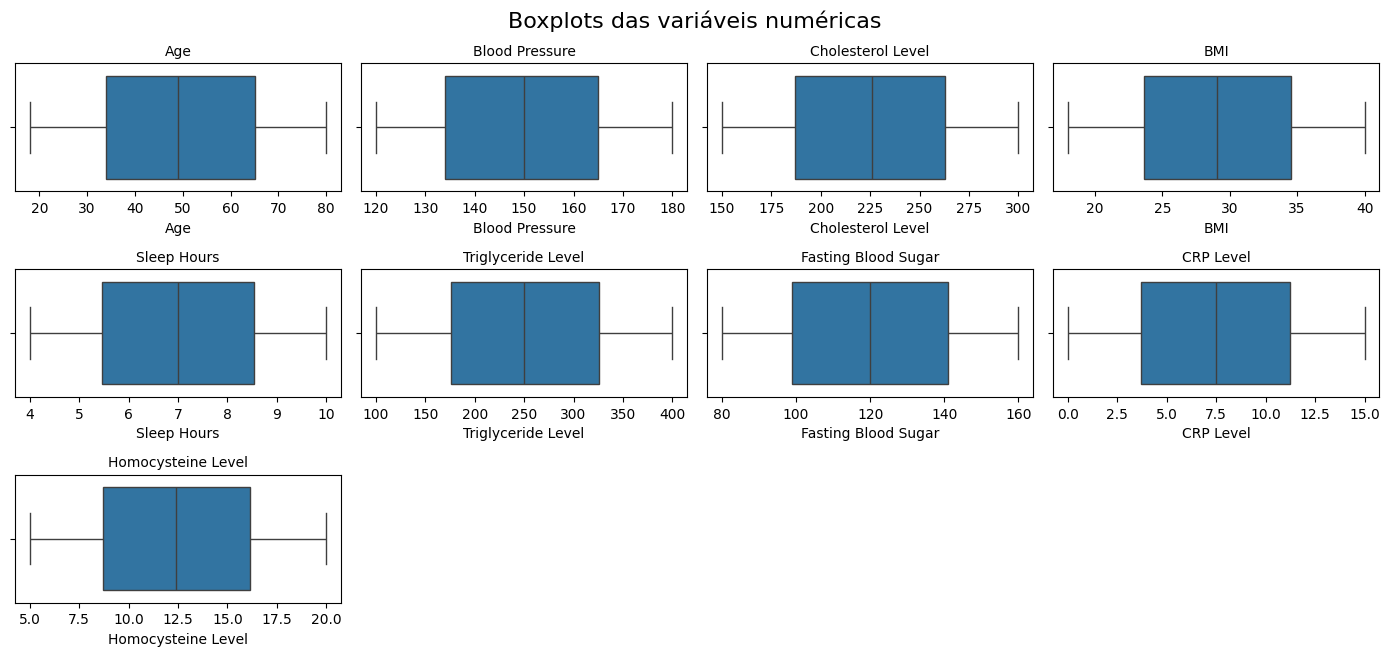

In [31]:
# Criar boxplots para cada vari√°vel num√©rica
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=data[col])
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.suptitle("Boxplots das vari√°veis num√©ricas", y=1.02, fontsize=16)
plt.show()

In [19]:
sns.countplot(x='Heart Disease Status', data=data_encoded)
plt.title('Distribui√ß√£o da vari√°vel alvo')
plt.xlabel('Status (0 = Sem doen√ßa, 1 = Com doen√ßa)')
plt.ylabel('N√∫mero de casos')
plt.show()

In [19]:
# Verifica a contagem das classes (0 e 1)
print(data_encoded['Heart Disease Status'].value_counts())

Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64


In [20]:
# Definir o X e y
X = data_encoded.drop('Heart Disease Status', axis=1)
y = data_encoded['Heart Disease Status']

In [21]:
# Aplicar SMOTE para gerar 300 amostras por classe
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={0: 8000, 1: 6000}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [22]:
# Criar novo DataFrame com os dados aumentados
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['Heart Disease Status'] = y_resampled

# Verificar a nova distribui√ß√£o
print(data_resampled['Heart Disease Status'].value_counts())

Heart Disease Status
0    8000
1    6000
Name: count, dtype: int64


In [23]:
# Aplicando o PCA para o treinamento. 
# PCA com 0.95% de componentes, para n√£o prejudicar o treinamento. 
# n_components=0.95 ‚Üí o PCA seleciona quantos componentes forem necess√°rios para manter 95% da vari√¢ncia dos dados originais;

# Separar X e y com base na coluna alvo
X = data_resampled.drop(columns=["Heart Disease Status"])
y = data_resampled["Heart Disease Status"]

# Normalizar os dados (PCA exige normaliza√ß√£o)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reduzir para 2 componentes principais
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


In [24]:
# Verificar quantos componentes foram selecionados
print(f"N√∫mero de componentes selecionados: {pca.n_components_}")

N√∫mero de componentes selecionados: 20


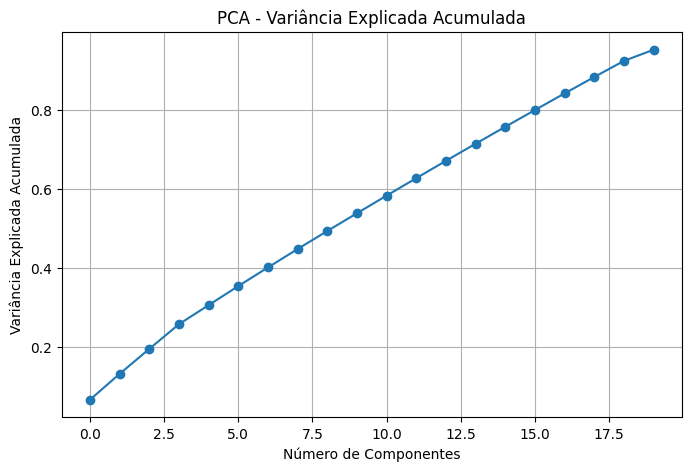

In [25]:
# Propor√ß√£o de vari√¢ncia explicada acumulada
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("N√∫mero de Componentes")
plt.ylabel("Vari√¢ncia Explicada Acumulada")
plt.title("PCA - Vari√¢ncia Explicada Acumulada")
plt.grid(True)
plt.show()


In [25]:
## Os dados est√£o desbalanceados. Utilizar a t√©cnica SMOTE(Synthetic Minority Over-sampling Technique) para criar dados sint√©ticos.

# 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y_resampled, random_state=42)


# Normalizando os dados(Deixar tudo na mesma escala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SMOTE  (j√° foi feito)
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Verificar o novo balanceamento
#print(pd.Series(y_train_resampled).value_counts())



In [59]:
# Agora est√° balanceado e normalizado.

Treinamento do modelo Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [27]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [28]:
## Avaliar a acuracia nos dados de treino 

y_pred_treino = rf.predict(X_train_scaled)

print(f'Acur√°cia de treino: {accuracy_score(y_train, y_pred_treino)}')



Acur√°cia de treino: 1.0


In [29]:
## Avaliar a acuracia nos dados de teste

y_pred_teste = rf.predict(X_test_scaled)

print(f'Acur√°cia de teste: {accuracy_score(y_test, y_pred_teste)}')

Acur√°cia de teste: 0.8114285714285714


In [64]:
"""
    A acur√°cia de treino est√° dando 1.0, ou seja o modelo aprendeu demais os dados
    de treino. Ocorreu overfitting. 

    Com o max_depth=15, ele reduz a acur√°cia de treino, isso melhora na quest√£o do overfitting. 
    Ou seja, com √°rvores menos profundas, reduz a chance de overfitting.

    Um f1-score bom n√£o significa que n√£o houve overfitting.

    Como ajustar isso ent√£o na fun√ß√£o fitness no GA?

    Sugest√£o: Penalizar √°rvores mais profundas e varia√ß√µes(desvio padr√£o):

        # Penaliza varia√ß√µes e profundidade
        penalty = (scores.std() * 0.5) + (int(max_depth) * 0.001)




"""

'\n    A acur√°cia de treino est√° dando 1.0, ou seja o modelo aprendeu demais os dados\n    de treino. Ocorreu overfitting. \n\n    Com o max_depth=15, ele reduz a acur√°cia de treino, isso melhora na quest√£o do overfitting. \n    Ou seja, com √°rvores menos profundas, reduz a chance de overfitting.\n\n    Um f1-score bom n√£o significa que n√£o houve overfitting.\n\n    Como ajustar isso ent√£o na fun√ß√£o fitness no GA?\n\n    Sugest√£o: Penalizar √°rvores mais profundas e varia√ß√µes(desvio padr√£o):\n\n        # Penaliza varia√ß√µes e profundidade\n        penalty = (scores.std() * 0.5) + (int(max_depth) * 0.001)\n\n\n\n\n'

In [30]:
# Relat√≥rio de desempenho
print(classification_report(y_test, y_pred_teste))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1]))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      2400
           1       0.88      0.65      0.75      1800

    accuracy                           0.81      4200
   macro avg       0.83      0.79      0.80      4200
weighted avg       0.82      0.81      0.81      4200

ROC AUC Score: 0.8607269675925926


In [31]:
## Otimiza√ß√£o com o algoritmo gen√©tico

## Fun√ß√£o de avalia√ß√£o (um conjunto de hiperpar√¢metros)

def evaluate(individual): 

    # Extra√≠ndo os valores dos genes
    n_estimators = int(individual[0])
    max_depth = int(individual[1])
    min_sample_split = int(individual[2])


    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_sample_split,
        class_weight='balanced',
        random_state=42
    )

    # Avaliar com valida√ß√£o cruzada com F1-score (3 folds)
    scores = cross_val_score(
        model, X_train_scaled, y_train, 
        cv=3, scoring='f1'
    )

    # Retornando a m√©dia do F1 - penalty, como tupla (DEAP exige tupla)

    # Penaliza varia√ß√µes e profundidade
    # penaliza√ß√£o por instabilidade entre folds  # penaliza√ß√£o leve por profundidade
    penalty = (scores.std() * 0.5) + (int(max_depth) * 0.001)
    return (scores.mean() - penalty,)

# Espa√ßo de busca
BOUNDS = {
    "n_estimators": (50, 70),
    "max_depth": (2, 15),
    "min_samples_split": (2, 10),
}


# Criando o tipo "fitness" que ser√° MAXIMIZADO
# weights=(1.0,): queremos maximizar o F1-score
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# Criando o tipo "individual" ‚Äî ou seja, uma lista com o nosso conjunto de genes
creator.create("Individual", list, fitness=creator.FitnessMax)

# Um indiv√≠duo √© um vetor [n_estimators, max_depth, min_samples_split]

## Toolbox: define como os indiv√≠duos s√£o criados e manipulados

toolbox = base.Toolbox()

# Define o espa√ßo de busca de cada gene
toolbox.register("attr_n_estimators", random.randint, 50, 70)
toolbox.register("attr_max_depth", random.randint, 2, 15)
toolbox.register("attr_min_samples_split", random.randint, 2, 10)

# Cria um indiv√≠duo com esses tr√™s atributos
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_n_estimators, toolbox.attr_max_depth, toolbox.attr_min_samples_split), n=1)

# Popula√ß√£o: uma lista de indiv√≠duos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


####  Operadores gen√©ticos

# Fun√ß√£o de avalia√ß√£o
toolbox.register("evaluate", evaluate)

# Cruzamento entre indiv√≠duos (uniforme = mistura gene a gene)
toolbox.register("mate", tools.cxUniform, indpb=0.5)

# Muta√ß√£o: altera genes aleatoriamente dentro dos limites
toolbox.register("mutate", tools.mutUniformInt, low=[50, 2, 2], up=[70, 15, 10], indpb=0.3)

# Sele√ß√£o: seleciona os melhores por torneio
toolbox.register("select", tools.selTournament, tournsize=3)


# indpb=0.2: cada gene tem 20% de chance de sofrer muta√ß√£o
# tournsize=3: escolhe o melhor entre 3 indiv√≠duos aleat√≥rios


# Fun√ß√£o principal que roda o algoritmo gen√©tico

def run_ga():
    start_time = time.time()  # in√≠cio do tempo de execu√ß√£o

    process = psutil.Process()
    mem_before = process.memory_info().rss / 1024**2  # mem√≥ria em MB antes

    # Cria a popula√ß√£o inicial com 10 indiv√≠duos
    pop = toolbox.population(n=10)

    # Hall of Fame: armazena o melhor indiv√≠duo encontrado
    hof = tools.HallOfFame(1)

    # Estat√≠sticas para acompanhar a evolu√ß√£o
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("max", np.max)


    # Executa o algoritmo gen√©tico por 8 gera√ß√µes
    pop, log = algorithms.eaSimple(
        pop, toolbox,
        cxpb=0.5,          # probabilidade de cruzamento
        mutpb=0.3,         # probabilidade de muta√ß√£o
        ngen=8,           # n√∫mero de gera√ß√µes
        stats=stats,      # Coleta estat√≠sticas de desempenho da popula√ß√£o. Ativado
        halloffame=hof,   # Armazena o melhor indiv√≠duo encontrado. Ativado
        verbose=True      # Exibe os logs durante a execu√ß√£o. True
    )

    mem_after = process.memory_info().rss / 1024**2  # mem√≥ria em MB depois
    end_time = time.time()  ## tempo final

    exec_time = end_time - start_time   ## tempo total da execu√ß√£o.
    mem_used = mem_after - mem_before  ## Total de mem√≥ria usada. 


    # Extrair os melhores hiperpar√¢metros encontrados
    best_n, best_depth, best_split = map(int, hof[0])

     # Treinar o modelo com os dados de treino balanceado
    best_model = RandomForestClassifier(
        n_estimators=best_n,
        max_depth=best_depth,
        min_samples_split=best_split,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )

    best_model.fit(X_train_scaled, y_train)

    # Avalia√ß√£o no treino
    y_pred_train = best_model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Avalia√ß√£o no teste
    y_pred_test = best_model.predict(X_test_scaled)
    y_proba_test = best_model.predict_proba(X_test_scaled)[:, 1]

    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_proba_test)

    # Salvando o espa√ßo de busca.
    search_space_str = ", ".join([f"{param}: {bounds}" for param, bounds in BOUNDS.items()])

    # Tabela com resultados
    results_table = pd.DataFrame([{
        "Tempo de Execu√ß√£o (s)": round(exec_time, 2),
        "Mem√≥ria Usada (MB)": round(mem_used, 2),
        "Melhor Solu√ß√£o": hof[0],
        "Fitness da Solu√ß√£o": round(hof[0].fitness.values[0], 4),
        "Acur√°cia (treino)": round(train_accuracy, 4),
        "Acur√°cia (teste)": round(test_accuracy, 4),
        "F1-score (teste)": round(test_f1, 4),
        "ROC AUC (teste)": round(test_auc, 4),
        "Espa√ßo de Busca": search_space_str
    }])

    print("\n Tabela de desempenho do algoritmo gen√©tico:")
    print(results_table.to_string(index=False))

    # Salvar em arquivo .txt
    with open("resultado_ga_4.txt", "w", encoding="utf-8") as f:
        f.write("Tabela de desempenho do algoritmo gen√©tico:\n")
        f.write(results_table.to_string(index=False))
        f.write("\n")


    return hof[0], log, results_table # Retorna o melhor indiv√≠duo e o hist√≥rico da evolu√ß√£o



gen	nevals	avg     	max     
0  	10    	0.678803	0.694515
1  	7     	0.68622 	0.694515
2  	6     	0.692935	0.694515
3  	8     	0.693844	0.694701
4  	7     	0.692558	0.697668
5  	9     	0.69444 	0.697668
6  	10    	0.695603	0.70153 
7  	6     	0.698219	0.70153 
8  	7     	0.70051 	0.705868

 Tabela de desempenho do algoritmo gen√©tico:
 Tempo de Execu√ß√£o (s)  Mem√≥ria Usada (MB) Melhor Solu√ß√£o  Fitness da Solu√ß√£o  Acur√°cia (treino)  Acur√°cia (teste)  F1-score (teste)  ROC AUC (teste)                                                        Espa√ßo de Busca
                241.29                7.84    [62, 12, 5]              0.7059             0.9573            0.7933            0.7336           0.8456 n_estimators: (50, 70), max_depth: (2, 15), min_samples_split: (2, 10)
 
 

üèÜ Melhor indiv√≠duo (hiperpar√¢metros otimizados): [62, 12, 5]
F1-score m√©dio na valida√ß√£o cruzada: 0.7059


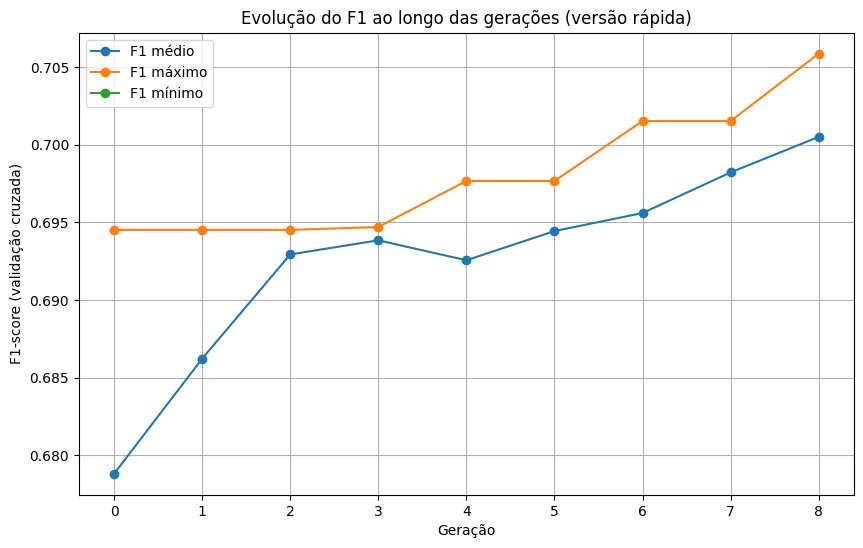

In [44]:
# Roda o algoritmo gen√©tico
best_individual, logbook, results_df = run_ga()

# Mostra os melhores hiperpar√¢metros encontrados
print(" ")
print(" ")
print(f"\nüèÜ Melhor indiv√≠duo (hiperpar√¢metros otimizados): {best_individual}")
print(f"F1-score m√©dio na valida√ß√£o cruzada: {best_individual.fitness.values[0]:.4f}")

# Gr√°fico de evolu√ß√£o
gen = logbook.select("gen")
avg = logbook.select("avg")
max_ = logbook.select("max")
min_ = logbook.select("min")

plt.figure(figsize=(10, 6))
plt.plot(gen, avg, label="F1 m√©dio", marker='o')
plt.plot(gen, max_, label="F1 m√°ximo", marker='o')
plt.plot(gen, min_, label="F1 m√≠nimo", marker='o')
plt.xlabel("Gera√ß√£o")
plt.ylabel("F1-score (valida√ß√£o cruzada)")
plt.title("Evolu√ß√£o do F1 ao longo das gera√ß√µes (vers√£o r√°pida)")
plt.grid(True)
plt.legend()
plt.show()

In [39]:
"""
Significado do que est√° sendo retornado:

gen ->	N√∫mero da gera√ß√£o
nevals ->	Quantos indiv√≠duos foram avaliados nessa gera√ß√£o
avg ->	M√©dia dos F1-scores da popula√ß√£o
max	-> Melhor F1-score da gera√ß√£o



"""

'\nSignificado do que est√° sendo retornado:\n\ngen ->\tN√∫mero da gera√ß√£o\nnevals ->\tQuantos indiv√≠duos foram avaliados nessa gera√ß√£o\navg ->\tM√©dia dos F1-scores da popula√ß√£o\nmax\t-> Melhor F1-score da gera√ß√£o\n\n\n\n'

In [ ]:
## Depois, fazer testes com uma profundidade de √°rvore menor e mais gera√ß√µes.
## Objetivo: Tentar melhorar o tempo de execu√ß√£o e melhorar as m√©tricas de avalia√ß√£o. 
## E registrar essa mudan√ßa. Mostrar que a profundidade da √°rvore reduzida pode aumentar a acur√°cia e melhorar o tempo de execu√ß√£o.


In [ ]:
# Relat√≥rio de classifica√ß√£o feito com o 1¬∫ Experimento com GA

## Construindo o melhor modelo com os par√¢metros √≥timos
# Constr√≥i o melhor modelo com os par√¢metros √≥timos
best_model = RandomForestClassifier(
    n_estimators=int(best_individual[0]),
    max_depth=int(best_individual[1]),
    min_samples_split=int(best_individual[2]),
    class_weight='balanced',
    random_state=42
)

# Treina com o conjunto balanceado
best_model.fit(X_train_scaled, y_train)


# Avalia no conjunto de teste (desbalanceado)
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]


print("\nüìä Avalia√ß√£o final no conjunto de teste:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")



üìä Avalia√ß√£o final no conjunto de teste:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      2400
           1       0.83      0.66      0.74      1800

    accuracy                           0.80      4200
   macro avg       0.81      0.78      0.79      4200
weighted avg       0.80      0.80      0.79      4200

ROC AUC Score: 0.8472


In [51]:
# Relat√≥rio de classifica√ß√£o feito com o 2¬∫ Experimento com GA

## Construindo o melhor modelo com os par√¢metros √≥timos
# Constr√≥i o melhor modelo com os par√¢metros √≥timos
best_model = RandomForestClassifier(
    n_estimators=int(best_individual[0]),
    max_depth=int(best_individual[1]),
    min_samples_split=int(best_individual[2]),
    class_weight='balanced',
    random_state=42
)

# Treina com o conjunto balanceado
best_model.fit(X_train_scaled, y_train)


# Avalia no conjunto de teste (desbalanceado)
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]


print("\nüìä Avalia√ß√£o final no conjunto de teste:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")



üìä Avalia√ß√£o final no conjunto de teste:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      2400
           1       0.88      0.66      0.75      1800

    accuracy                           0.82      4200
   macro avg       0.83      0.80      0.80      4200
weighted avg       0.83      0.82      0.81      4200

ROC AUC Score: 0.8574


In [58]:
# Relat√≥rio de classifica√ß√£o feito com o 3¬∫ Experimento com GA

## Construindo o melhor modelo com os par√¢metros √≥timos
# Constr√≥i o melhor modelo com os par√¢metros √≥timos
best_model = RandomForestClassifier(
    n_estimators=int(best_individual[0]),
    max_depth=int(best_individual[1]),
    min_samples_split=int(best_individual[2]),
    class_weight='balanced',
    random_state=42
)

# Treina com o conjunto balanceado
best_model.fit(X_train_scaled, y_train)


# Avalia no conjunto de teste (desbalanceado)
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]


print("\nüìä Avalia√ß√£o final no conjunto de teste:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


üìä Avalia√ß√£o final no conjunto de teste:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2400
           1       0.86      0.66      0.74      1800

    accuracy                           0.81      4200
   macro avg       0.82      0.79      0.79      4200
weighted avg       0.81      0.81      0.80      4200

ROC AUC Score: 0.8526


In [ ]:
## Relat√≥rio de classifica√ß√£o do 1¬∫ experimento com GA:

def gerar_relatorio_classificacao_txt():
    relatorio = """\
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      2400
           1       0.83      0.66      0.74      1800

    accuracy                           0.80      4200
   macro avg       0.81      0.78      0.79      4200
weighted avg       0.80      0.80      0.79      4200
"""
    with open("relatorio_classificacao_GA_1.txt", "w", encoding="utf-8") as f:
        f.write(relatorio)

if __name__ == "__main__":
    gerar_relatorio_classificacao_txt()
    print("Arquivo 'relatorio_classificacao_GA_1.txt' criado com sucesso!")

Arquivo 'relatorio_classificacao_GA_1.txt' criado com sucesso!


In [ ]:
## Relat√≥rio de classifica√ß√£o do 2¬∫ experimento com GA:

def gerar_relatorio_classificacao_txt():
    relatorio = """\
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      2400
           1       0.88      0.66      0.75      1800

    accuracy                           0.82      4200
   macro avg       0.83      0.80      0.80      4200
weighted avg       0.83      0.82      0.81      4200
"""
    with open("relatorio_classificacao_GA_2.txt", "w", encoding="utf-8") as f:
        f.write(relatorio)

if __name__ == "__main__":
    gerar_relatorio_classificacao_txt()
    print("Arquivo 'relatorio_classificacao_GA_2.txt' criado com sucesso!")

Arquivo 'relatorio_classificacao_GA_2.txt' criado com sucesso!


In [59]:
## Relat√≥rio de classifica√ß√£o do 3¬∫ experimento com GA:

def gerar_relatorio_classificacao_txt():
    relatorio = """\
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2400
           1       0.86      0.66      0.74      1800

    accuracy                           0.81      4200
   macro avg       0.82      0.79      0.79      4200
weighted avg       0.81      0.81      0.80      4200
"""
    with open("relatorio_classificacao_GA_3.txt", "w", encoding="utf-8") as f:
        f.write(relatorio)

if __name__ == "__main__":
    gerar_relatorio_classificacao_txt()
    print("Arquivo 'relatorio_classificacao_GA_3.txt' criado com sucesso!")

Arquivo 'relatorio_classificacao_GA_3.txt' criado com sucesso!


In [ ]:
###################          ########################          #####################         #############################

In [70]:
""" Evolu√ß√£o diferencial """

' Evolu√ß√£o diferencial '

In [44]:
# Fun√ß√£o de avalia√ß√£o para DE
def evaluate_de(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )

    scores = cross_val_score(model, X_train_scaled, y_train,
                             cv=3, scoring='f1')


    penalty = (scores.std() * 0.5) + (max_depth * 0.001)
    fitness = scores.mean() - penalty

    # Log para acompanhamento
    print(f"[INFO] F1 m√©dio: {scores.mean():.4f} | Penalidade: {penalty:.4f} | Fitness real: {fitness:.4f}")

    return -fitness # DE minimiza

# Defini√ß√£o dos limites de busca
bounds = [(170, 190), (10, 15), (2, 20)]

# Execu√ß√£o do DE
start_time = time.time()
process = psutil.Process()
mem_before = process.memory_info().rss / 1024**2

result = differential_evolution(
    evaluate_de,
    bounds,
    strategy='best1bin',  ## Estrat√©gia padr√£o. Significa: o melhor vetor da popula√ß√£o atual √© usado como base (a), para construir o mutante. "bin" indica que o cruzamento (recombina√ß√£o) √© feito de forma bin√°ria, gene a gene, usando probabilidade.
    mutation=(0.5, 1), # Par√¢metro F (fator de escala da diferen√ßa vetorial). Est√° sendo sorteado aleatoriamente entre 0.5 e 1.0 a cada gera√ß√£o. Esse valor controla o quanto a diferen√ßa (b - c) impacta na nova solu√ß√£o.
    recombination=0.7, 
    seed=42,
    tol=0.01,  # Crit√©rio de toler√¢ncia para parada antecipada: Se a mudan√ßa no melhor valor da fun√ß√£o objetivo entre gera√ß√µes for menor que 0.01, o algoritmo pode parar antes do maxiter
    maxiter=20,  # N√∫mero m√°ximo de gera√ß√µes (itera√ß√µes). Ou seja, o algoritmo rodar√° no m√°ximo 20 vezes, a n√£o ser que a toler√¢ncia seja atingida antes.
    popsize=10,  # Tamanho da popula√ß√£o, ou seja, quantas solu√ß√µes candidatas existem por gera√ß√£o. 10 x len(bound), ou seja 30 indiv√≠duos. 
    disp=True    # Mostra o desempenho durante a execu√ß√£o.
)

mem_after = process.memory_info().rss / 1024**2
end_time = time.time()

exec_time = end_time - start_time   ## tempo total da execu√ß√£o.
mem_used = mem_after - mem_before  ## Total de mem√≥ria usada. 

# Resultados
best_n, best_depth, best_split = map(int, result.x)
best_model = RandomForestClassifier(
    n_estimators=best_n,
    max_depth=best_depth,
    min_samples_split=best_split,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
best_model.fit(X_train_scaled, y_train)

y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)
y_proba_test = best_model.predict_proba(X_test_scaled)[:, 1]

# M√©tricas
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_proba_test)


# Nomes dos par√¢metros (na mesma ordem da lista 'bounds')
param_names = ["n_estimators", "max_depth", "min_samples_split"]

# Gera√ß√£o da string do espa√ßo de busca
search_space_str = ", ".join([
    f"{name}: {b}" for name, b in zip(param_names, bounds)
])

# Tabela de resultados
results_table = pd.DataFrame([{
    "Tempo de Execu√ß√£o (s)": round(exec_time, 2),
    "Mem√≥ria Usada (MB)": round(mem_used, 2),
    "Melhor Solu√ß√£o": [best_n, best_depth, best_split],
    "Fitness da Solu√ß√£o": -round(result.fun, 4),
    "Acur√°cia (treino)": round(train_accuracy, 4),
    "Acur√°cia (teste)": round(test_accuracy, 4),
    "F1-score (teste)": round(test_f1, 4),
    "ROC AUC (teste)": round(test_auc, 4),
    "Espa√ßo de Busca": search_space_str
}])


print("\nüìä Tabela de desempenho da Evolu√ß√£o Diferencial:")
print(results_table.to_string(index=False))


# Salvar em arquivo .txt
with open("resultado_evoDif_6.txt", "w", encoding="utf-8") as f:
    f.write("Tabela de desempenho do algoritmo de Evolu√ß√£o Diferencial:\n")
    f.write(results_table.to_string(index=False))
    f.write("\n")




[INFO] F1 m√©dio: 0.7215 | Penalidade: 0.0190 | Fitness real: 0.7025
[INFO] F1 m√©dio: 0.7207 | Penalidade: 0.0188 | Fitness real: 0.7019
[INFO] F1 m√©dio: 0.7231 | Penalidade: 0.0145 | Fitness real: 0.7086
[INFO] F1 m√©dio: 0.7190 | Penalidade: 0.0163 | Fitness real: 0.7027
[INFO] F1 m√©dio: 0.7154 | Penalidade: 0.0153 | Fitness real: 0.7001
[INFO] F1 m√©dio: 0.7267 | Penalidade: 0.0169 | Fitness real: 0.7098
[INFO] F1 m√©dio: 0.7247 | Penalidade: 0.0165 | Fitness real: 0.7082
[INFO] F1 m√©dio: 0.7219 | Penalidade: 0.0173 | Fitness real: 0.7047
[INFO] F1 m√©dio: 0.7174 | Penalidade: 0.0160 | Fitness real: 0.7013
[INFO] F1 m√©dio: 0.7143 | Penalidade: 0.0155 | Fitness real: 0.6989
[INFO] F1 m√©dio: 0.7205 | Penalidade: 0.0174 | Fitness real: 0.7031
[INFO] F1 m√©dio: 0.7158 | Penalidade: 0.0153 | Fitness real: 0.7005
[INFO] F1 m√©dio: 0.7192 | Penalidade: 0.0173 | Fitness real: 0.7019
[INFO] F1 m√©dio: 0.7239 | Penalidade: 0.0170 | Fitness real: 0.7069
[INFO] F1 m√©dio: 0.7233 | Penalid

In [49]:
# Nomes dos par√¢metros (na mesma ordem da lista 'bounds')
param_names = ["n_estimators", "max_depth", "min_samples_split"]

# Gera√ß√£o da string do espa√ßo de busca
search_space_str = ", ".join([
    f"{name}: {b}" for name, b in zip(param_names, bounds)
])

In [50]:
search_space_str


'n_estimators: (50, 150), max_depth: (5, 40), min_samples_split: (2, 20)'

In [51]:

best_params = [int(x) for x in result.x]

In [35]:
# Relat√≥rio de classifica√ß√£o feito com o 1¬∫ Experimento com ED

## Construindo o melhor modelo com os par√¢metros √≥timos
# Constr√≥i o melhor modelo com os par√¢metros √≥timos
# Extrair os melhores hiperpar√¢metros encontrados pela ED
best_params = [int(x) for x in result.x]
n_estimators, max_depth, min_samples_split = best_params

# Treinar o modelo com os melhores hiperpar√¢metros
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Fazer previs√µes
y_pred = model.predict(X_test_scaled)

# Gerar o relat√≥rio de classifica√ß√£o
report = classification_report(y_test, y_pred, digits=4)

# Exibir no console
print("\nRelat√≥rio de Classifica√ß√£o (teste):")
print(report)

# Salvar em arquivo
with open("relatorio_classificacao_ED_1.txt", "w", encoding="utf-8") as f:
    f.write("Relat√≥rio de Classifica√ß√£o - Evolu√ß√£o Diferencial:\n")
    f.write(report)


Relat√≥rio de Classifica√ß√£o (teste):
              precision    recall  f1-score   support

           0     0.7736    0.9267    0.8432      2400
           1     0.8672    0.6383    0.7354      1800

    accuracy                         0.8031      4200
   macro avg     0.8204    0.7825    0.7893      4200
weighted avg     0.8137    0.8031    0.7970      4200



In [ ]:
# Relat√≥rio de classifica√ß√£o feito com o 2¬∫ Experimento com ED

## Construindo o melhor modelo com os par√¢metros √≥timos
# Constr√≥i o melhor modelo com os par√¢metros √≥timos
# Extrair os melhores hiperpar√¢metros encontrados pela ED
best_params = [int(x) for x in result.x]
n_estimators, max_depth, min_samples_split = best_params

# Treinar o modelo com os melhores hiperpar√¢metros
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Fazer previs√µes
y_pred = model.predict(X_test_scaled)

# Gerar o relat√≥rio de classifica√ß√£o
report = classification_report(y_test, y_pred, digits=4)

# Exibir no console
print("\nRelat√≥rio de Classifica√ß√£o (teste):")
print(report)

# Salvar em arquivo
with open("relatorio_classificacao_ED_2.txt", "w", encoding="utf-8") as f:
    f.write("Relat√≥rio de Classifica√ß√£o - Evolu√ß√£o Diferencial:\n")
    f.write(report)


Relat√≥rio de Classifica√ß√£o (teste):
              precision    recall  f1-score   support

           0     0.7678    0.9329    0.8424      2400
           1     0.8746    0.6239    0.7283      1800

    accuracy                         0.8005      4200
   macro avg     0.8212    0.7784    0.7853      4200
weighted avg     0.8136    0.8005    0.7935      4200



In [35]:
# Relat√≥rio de classifica√ß√£o feito com o 3¬∫ Experimento com ED

## Construindo o melhor modelo com os par√¢metros √≥timos
# Constr√≥i o melhor modelo com os par√¢metros √≥timos
# Extrair os melhores hiperpar√¢metros encontrados pela ED
best_params = [int(x) for x in result.x]
n_estimators, max_depth, min_samples_split = best_params

# Treinar o modelo com os melhores hiperpar√¢metros
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Fazer previs√µes
y_pred = model.predict(X_test_scaled)

# Gerar o relat√≥rio de classifica√ß√£o
report = classification_report(y_test, y_pred, digits=4)

# Exibir no console
print("\nRelat√≥rio de Classifica√ß√£o (teste):")
print(report)

# Salvar em arquivo
with open("relatorio_classificacao_ED_3.txt", "w", encoding="utf-8") as f:
    f.write("Relat√≥rio de Classifica√ß√£o - Evolu√ß√£o Diferencial:\n")
    f.write(report)


Relat√≥rio de Classifica√ß√£o (teste):
              precision    recall  f1-score   support

           0     0.7746    0.9267    0.8439      2400
           1     0.8676    0.6406    0.7370      1800

    accuracy                         0.8040      4200
   macro avg     0.8211    0.7836    0.7904      4200
weighted avg     0.8145    0.8040    0.7981      4200



In [37]:
# Relat√≥rio de classifica√ß√£o feito com o 4¬∫ Experimento com ED

## Construindo o melhor modelo com os par√¢metros √≥timos
# Constr√≥i o melhor modelo com os par√¢metros √≥timos
# Extrair os melhores hiperpar√¢metros encontrados pela ED
best_params = [int(x) for x in result.x]
n_estimators, max_depth, min_samples_split = best_params

# Treinar o modelo com os melhores hiperpar√¢metros
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Fazer previs√µes
y_pred = model.predict(X_test_scaled)

# Gerar o relat√≥rio de classifica√ß√£o
report = classification_report(y_test, y_pred, digits=4)

# Exibir no console
print("\nRelat√≥rio de Classifica√ß√£o (teste):")
print(report)

# Salvar em arquivo
with open("relatorio_classificacao_ED_4.txt", "w", encoding="utf-8") as f:
    f.write("Relat√≥rio de Classifica√ß√£o - Evolu√ß√£o Diferencial:\n")
    f.write(report)


Relat√≥rio de Classifica√ß√£o (teste):
              precision    recall  f1-score   support

           0     0.7767    0.9350    0.8486      2400
           1     0.8810    0.6417    0.7425      1800

    accuracy                         0.8093      4200
   macro avg     0.8289    0.7883    0.7955      4200
weighted avg     0.8214    0.8093    0.8031      4200



In [39]:
# Relat√≥rio de classifica√ß√£o feito com o 5¬∫ Experimento com ED

## Construindo o melhor modelo com os par√¢metros √≥timos
# Constr√≥i o melhor modelo com os par√¢metros √≥timos
# Extrair os melhores hiperpar√¢metros encontrados pela ED
best_params = [int(x) for x in result.x]
n_estimators, max_depth, min_samples_split = best_params

# Treinar o modelo com os melhores hiperpar√¢metros
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Fazer previs√µes
y_pred = model.predict(X_test_scaled)

# Gerar o relat√≥rio de classifica√ß√£o
report = classification_report(y_test, y_pred, digits=4)

# Exibir no console
print("\nRelat√≥rio de Classifica√ß√£o (teste):")
print(report)

# Salvar em arquivo
with open("relatorio_classificacao_ED_5.txt", "w", encoding="utf-8") as f:
    f.write("Relat√≥rio de Classifica√ß√£o - Evolu√ß√£o Diferencial:\n")
    f.write(report)


Relat√≥rio de Classifica√ß√£o (teste):
              precision    recall  f1-score   support

           0     0.7752    0.9337    0.8471      2400
           1     0.8785    0.6389    0.7398      1800

    accuracy                         0.8074      4200
   macro avg     0.8268    0.7863    0.7934      4200
weighted avg     0.8195    0.8074    0.8011      4200



In [45]:
# Relat√≥rio de classifica√ß√£o feito com o 6¬∫ Experimento com ED

## Construindo o melhor modelo com os par√¢metros √≥timos
# Constr√≥i o melhor modelo com os par√¢metros √≥timos
# Extrair os melhores hiperpar√¢metros encontrados pela ED
best_params = [int(x) for x in result.x]
n_estimators, max_depth, min_samples_split = best_params

# Treinar o modelo com os melhores hiperpar√¢metros
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Fazer previs√µes
y_pred = model.predict(X_test_scaled)

# Gerar o relat√≥rio de classifica√ß√£o
report = classification_report(y_test, y_pred, digits=4)

# Exibir no console
print("\nRelat√≥rio de Classifica√ß√£o (teste):")
print(report)

# Salvar em arquivo
with open("relatorio_classificacao_ED_6.txt", "w", encoding="utf-8") as f:
    f.write("Relat√≥rio de Classifica√ß√£o - Evolu√ß√£o Diferencial:\n")
    f.write(report)



Relat√≥rio de Classifica√ß√£o (teste):
              precision    recall  f1-score   support

           0     0.7756    0.9358    0.8482      2400
           1     0.8819    0.6389    0.7410      1800

    accuracy                         0.8086      4200
   macro avg     0.8287    0.7874    0.7946      4200
weighted avg     0.8211    0.8086    0.8022      4200

